# Nearest neighbours
Supervised learning for classification which works by looking at neighbouring points in the dataset to classify new unknown data points. Simply said, if you were to plot the data in a graph points that are close together will probably have the same label. The K in the name stands for the number of nearest neighbours to consider for making the classification.

A trained KNN (K-nearest neighbours) model basically consists of the training data since the classification is done by comparing the known data to the new data. This can make these models slow if the training data is large.

The most excellent Scikit Learn package has prebuilt functions available to use, so we don't actually need to do much programming at all.

https://datagy.io/python-knn/

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
import pandas as pd
import numpy as np

Since this is a supervised learning algorithm, we need a data set to train on that is already labelled. One popular dataset to explore this technique with is the Palmer Penguins dataset that is available on [CRAN](https://cran.r-project.org/web/packages/palmerpenguins/index.html). It's a nice data set because it works with only two features which means it's easy to plot in 2D. It's included in the Seaborn plotting library.

# Penguins
We'll just drop the rows with NA cells since we have enough data. Normally you'd want to try to fill in the missing data as best as you can like we did before.

In [3]:
import seaborn as sns

In [4]:
penguins = sns.load_dataset('penguins').dropna()

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Making a pair plot of the bill dimensions and colouring by species shows that there is indeed a relatively good split

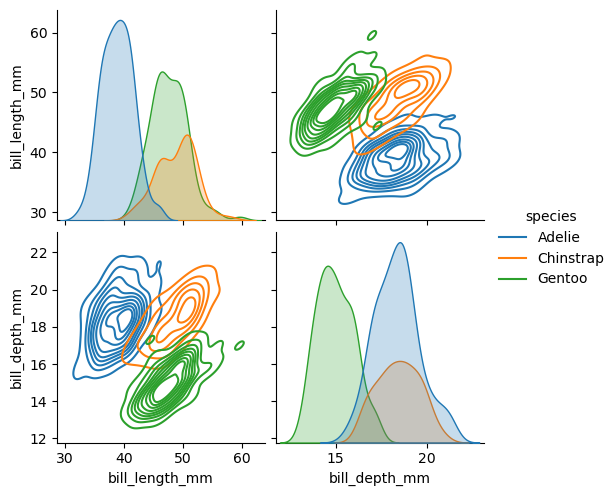

In [6]:
sns.pairplot(penguins[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species', kind='kde')

We can see right away that clusters appear without even using the other data fields so we don't need those at all.

Of course we want to test how good our model is, so will do what we did before which is to split our data in a training and test dataset.

In [7]:
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['species']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

We now have a training set `X_train, y_train` and a test set we can use for validation afterwards, `X_test, y_test`.

From sklearn we can use the `KNeighborsClassifier` and specify any parameter we want. Let's use $k=4$ where $k$ is the number of nearest neighbours the algoritm should take into account.

In [9]:
neigh = KNeighborsClassifier(n_neighbors=4)

Then we fit this to the training data.

In [10]:
neigh.fit(X_train, y_train)

/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

Let's see how well we did. We can make a prediction now using the `predict` method using our test input and then compare that to the prediction

In [11]:
y_pred = neigh.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.9615384615384616

So we got a 94.9% accuracy. That is not bad at all!

We don't have to stick with two dimenions for the input even though that make it a lot easier to visualize things. That is, you can actually see the clusters in a plot in the case of the penguins. Once you get to input dimensions higher than 3 however, plotting things becomes very hard.

Let's see what happens when we add more data.

In [13]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6623931623931624

Oh no! Our accuracy is only 73.9% now. What happened here? Let's look at the pair plots which is the next best thing for plotting multidimensional data.

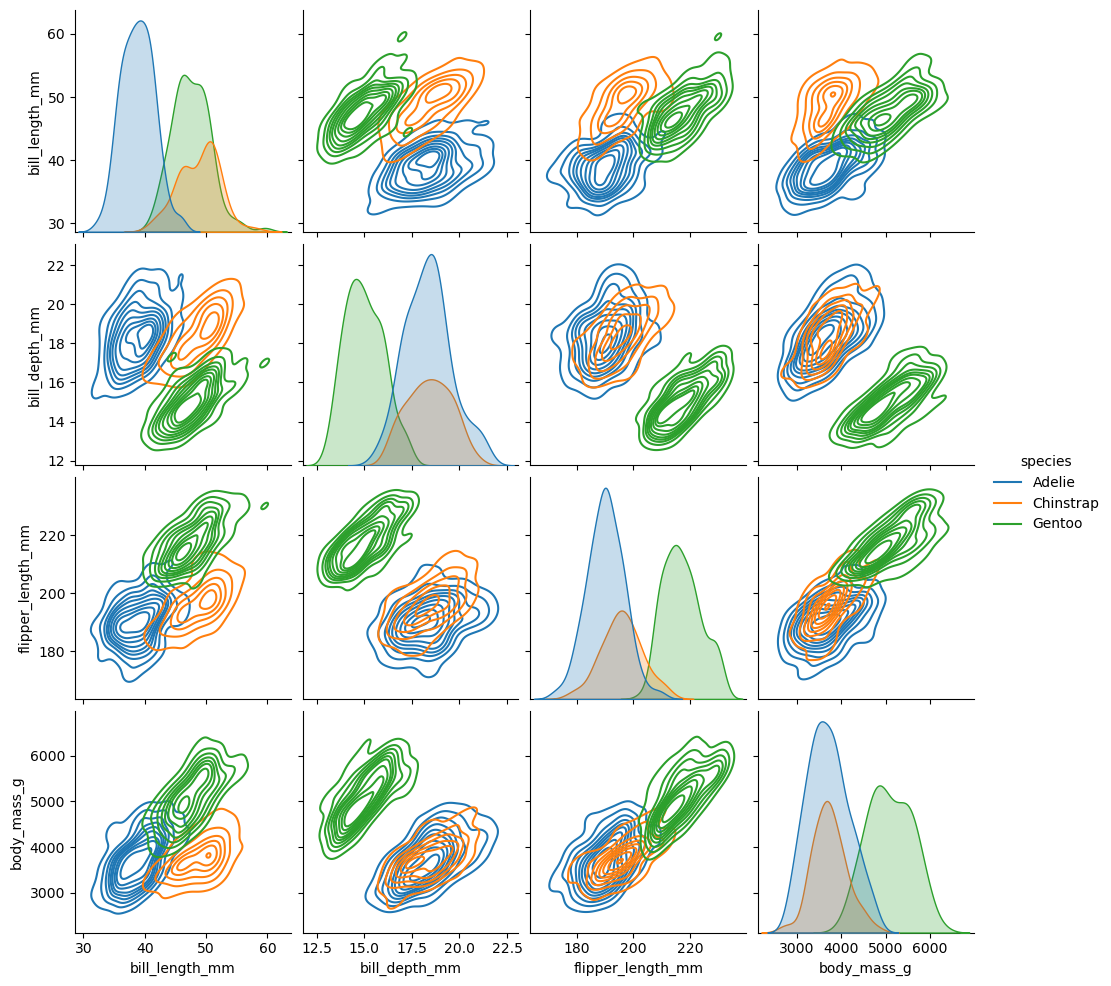

In [14]:
sns.pairplot(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']], hue='species', kind='kde')

We see that there is an awful lot of mixing going on for Adelie and Chinstrap penguins. For example, `body_mass_g` and other `bill_depth_mm` and `flipper_length_mm` don't work well.

Additionally, body_mass_g is much larger than the other properties. This will affect the distance measurements.

It is usually a good idea to normalize the data unless all data is in similar ranges. Sklearn comes with just such a tool, `MinMaxScaler`! It maps the data to a range between 0 and 1.

In [15]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins[['species']]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9700854700854701

There we go! We now have 98.7% accuracy!

We still haven't used all of the data though. There are still the islands and the sex. However, those aren't numbers so how do you calculate distances there? It's maybe clear for sex since we have only female and male, so we could assign 0 and 1 to that.

In [16]:
penguins.sex = penguins.sex.replace({"Female": 0, "Male": 1})
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


but there are three islands in our dataset:

In [17]:
set(penguins['island'])

{'Biscoe', 'Dream', 'Torgersen'}

We could assign 0 to Biscoe, 1 to Dream and 2 to Torgersen, but that would make Biscoe and Torgersen further away from each other than Biscoe and Dream. That's not right.

One way around this is to use one-hot vectors. Instead of assigning a number to an island, we assign a vector.

$$
Biscoe = \begin{bmatrix}
           1 \\
           0 \\
           0
         \end{bmatrix},
Dream = \begin{bmatrix}
           0 \\
           1 \\
           0
         \end{bmatrix},
Torgersen = \begin{bmatrix}
           0 \\
           0 \\
           1
         \end{bmatrix}
$$

This translates into using the island column to generate three separate columns, one for each island with either 0 or 1.

In [18]:
penguins = penguins.join(pd.get_dummies(penguins['island']))
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0,1,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0,1,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1,1,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0,1,0,0


Our data is now all numerical. Let's try that again!

In [19]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'Biscoe', 'Dream', 'Torgersen']]
y = penguins[['species']]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9871794871794872

Well, it's hard to beat that accuracy!

# Diabetes

Let's use a less clean dataset this time. The penguins one was cleaned up thoroughly beforehand. One such dataset is the Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, which contains information of 768 women from a population near Phoenix, Arizona, USA. It can be used to predict diabetes.

It's a bit messier because it contains missing data.

In [20]:
# From https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset
diabetesdata = pd.read_csv('diabetes.csv')
diabetesdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Notice all the zeros there. I'm pretty sure most people have a skin thickness of more than 0 μm. No insulin is probably also very bad, so this means that it must be missing data.

In [21]:
print("Number of zeros")
print('Glucose:', sum(diabetesdata['Glucose'] == 0))
print('BloodPressure:', sum(diabetesdata['BloodPressure'] == 0))
print('SkinThickness:', sum(diabetesdata['SkinThickness'] <= 0.0001))
print('Insulin:', sum(diabetesdata['Insulin'] == 0))
print('BMI:', sum(diabetesdata['BMI'] <= 0.0001))
print('DiabetesPedigreeFunction:', sum(diabetesdata['DiabetesPedigreeFunction'] == 0))
print('Age:', sum(diabetesdata['Age'] == 0))

Number of zeros
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


That's a lot of missing data for insulin as well as for skin thickness. Anyway, let's replace these with our trusty NaN.

In [22]:
diabetesdata.replace(
    to_replace={'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0},
    value=np.nan,
    inplace=True
)

Let's look at the pair plot again. KNN likes very distinct regions!

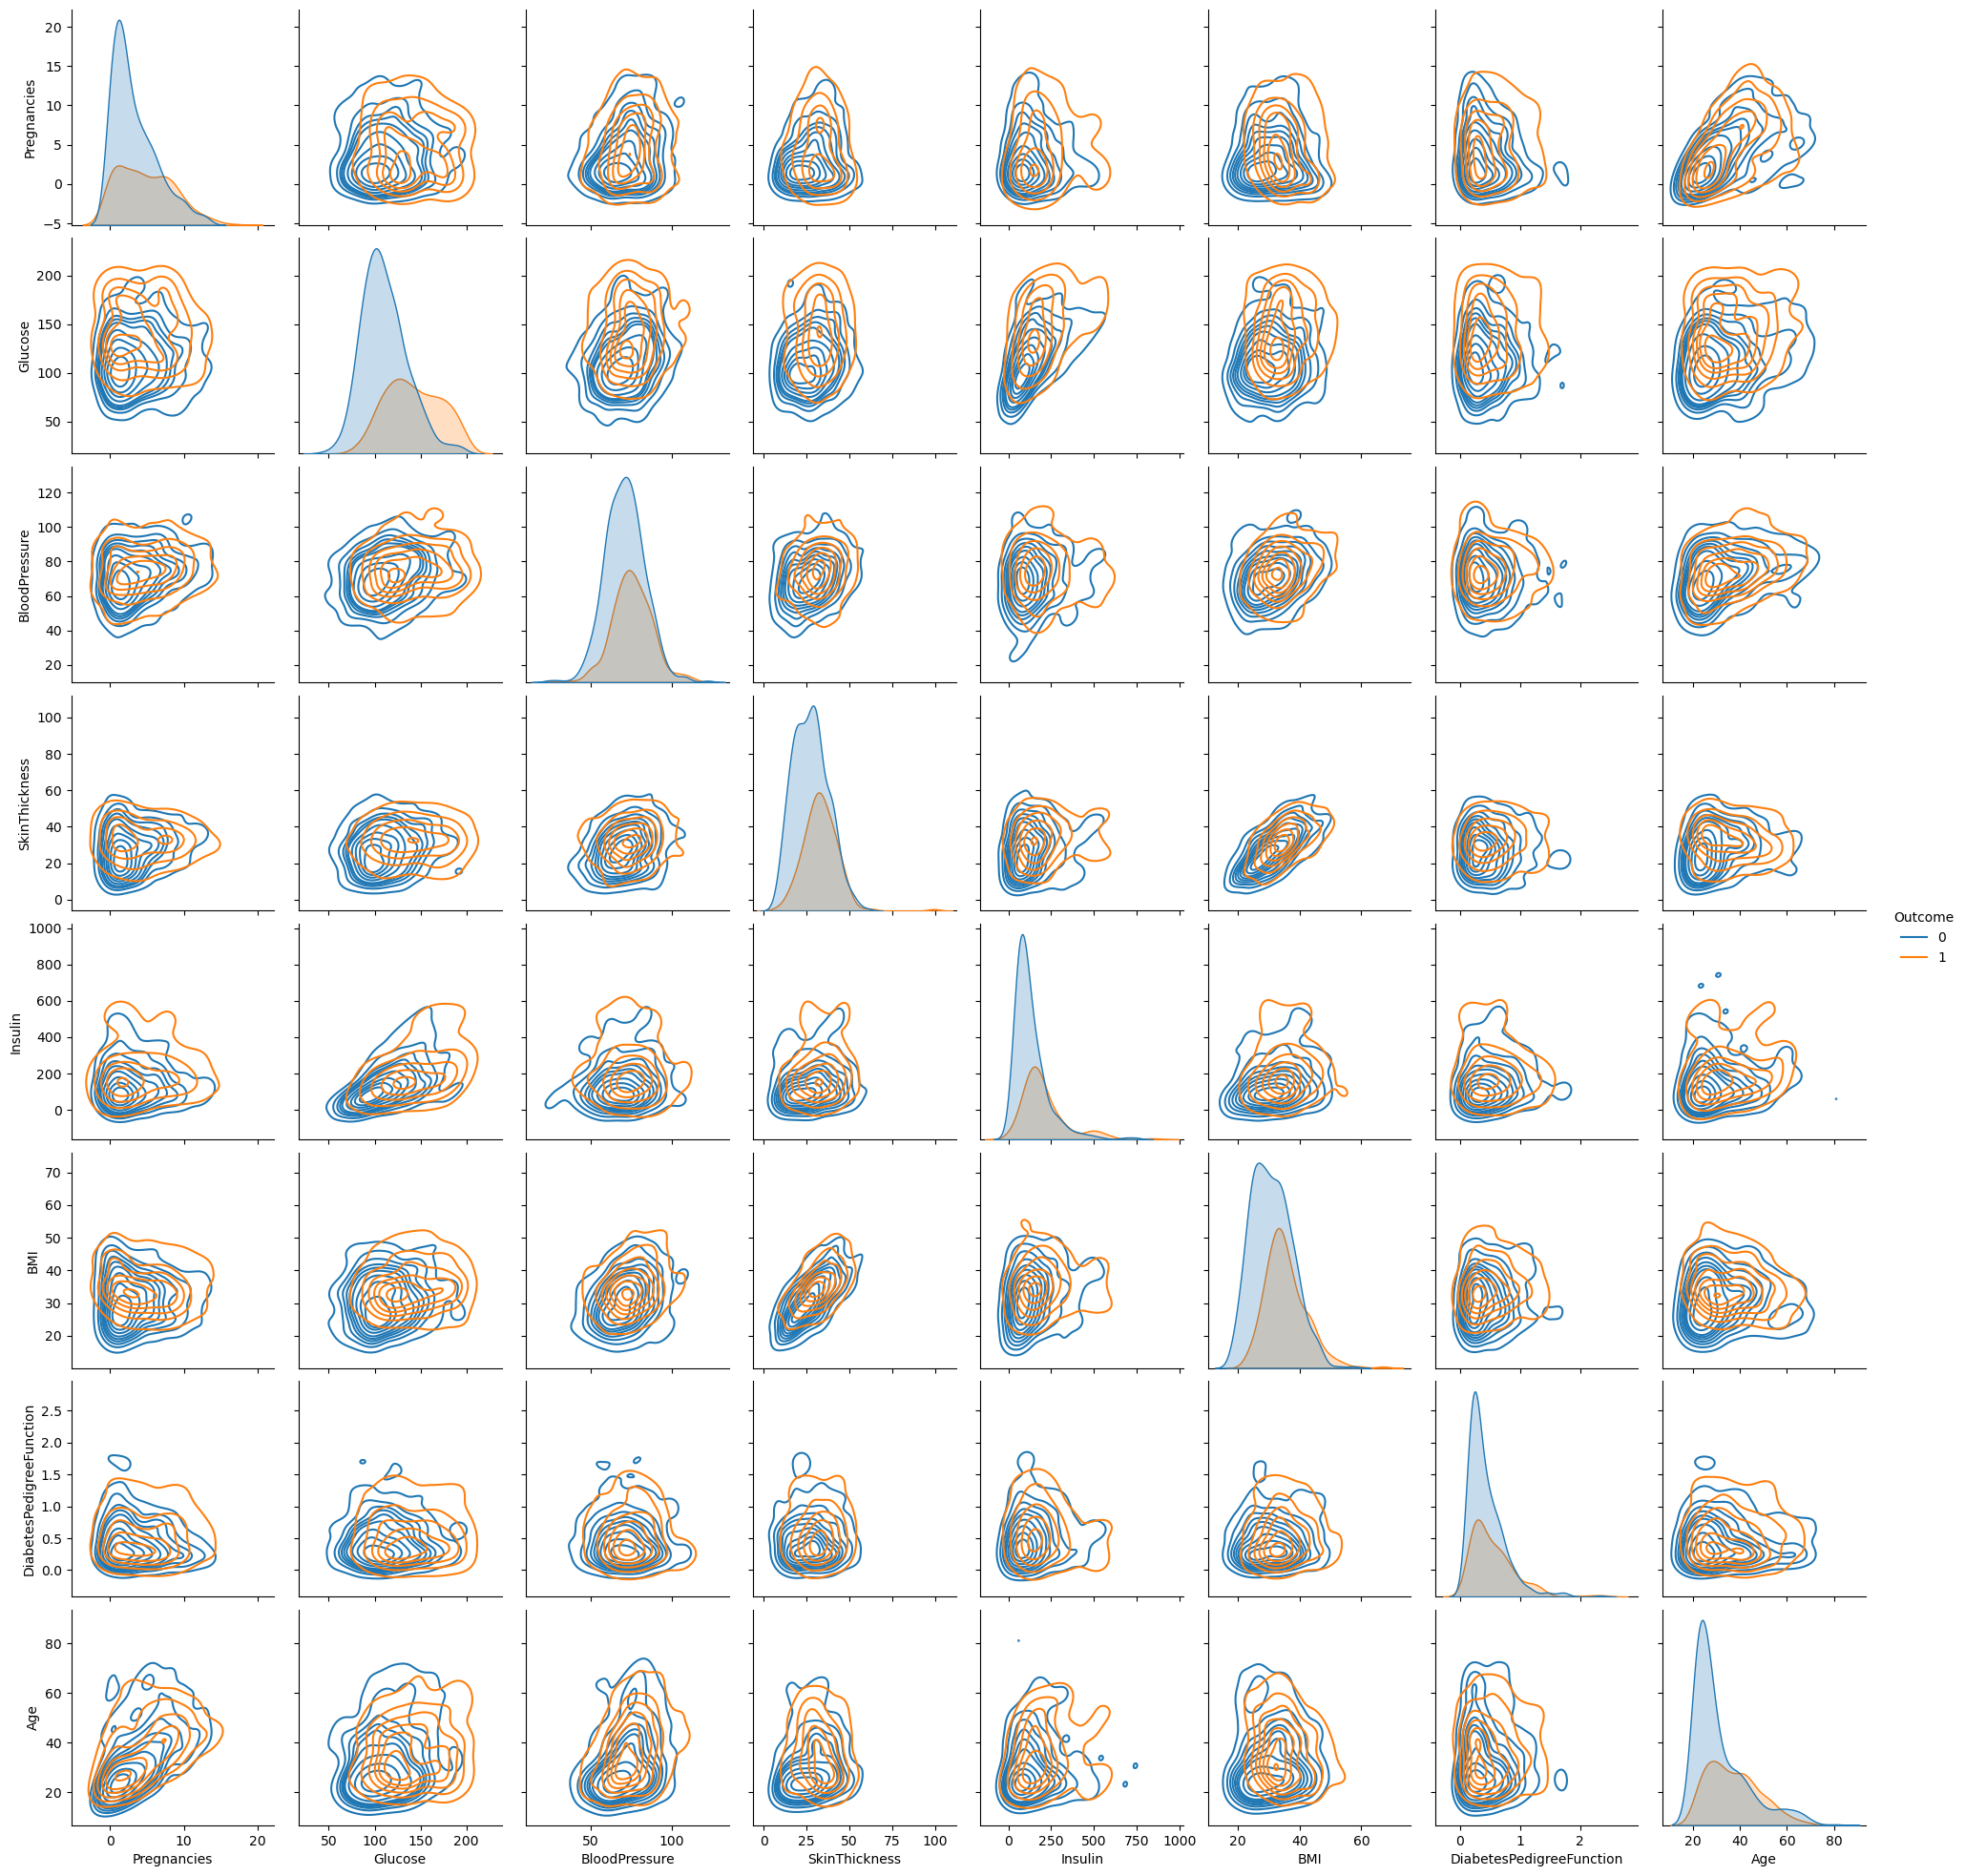

In [23]:
sns.pairplot(diabetesdata, hue='Outcome', kind='kde')

Well, that's not great. There is not really much distinct blobs here. However, no need to fear yet! We are just looking at one feature vs another. There could still very well be distinct blobs in the full 6D space. We'll just go ahead.

First, we'll need to do something about the missing values. We could just drop them:

In [24]:
diabetesdata.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


That means we'll have just slightly over half of our data remaining, but it would still be a decent size.

In [25]:
392 / 768 * 100

51.041666666666664

Another thing we can do is ~~lie~~ impute

In [26]:
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


So, Glucose and BMI are the least bad ones. What does BMI look like?

array([[<Axes: title={'center': 'BMI'}>]], dtype=object)

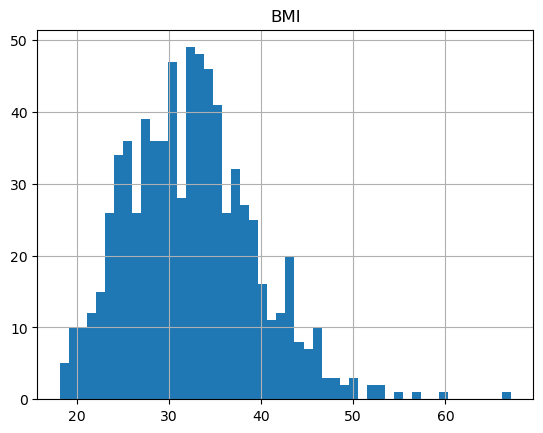

In [27]:
diabetesdata.hist('BMI', bins=50)

Since there are so few, we could just replace them with the mean or maybe better, the median since there is a fair number of people with really high BMI

In [28]:
diabetesdata['BMI'].fillna(diabetesdata['BMI'].median(), inplace=True)

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

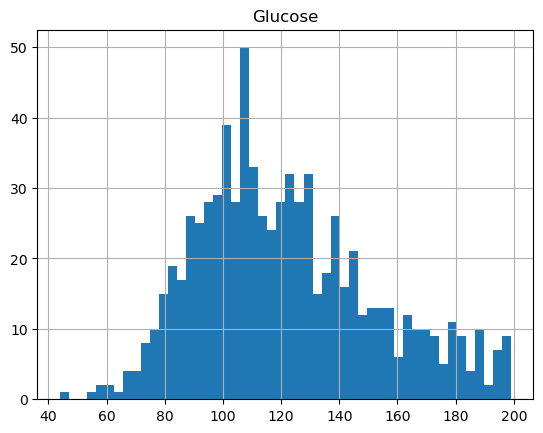

In [29]:
diabetesdata.hist('Glucose', bins=50)

In [30]:
diabetesdata['Glucose'].fillna(diabetesdata['Glucose'].median(), inplace=True)

So what do we now for complete rows?

In [31]:
len(diabetesdata.dropna())

394

I guess we only gained two rows there. The next bad one is BloodPressure.

array([[<Axes: title={'center': 'BloodPressure'}>]], dtype=object)

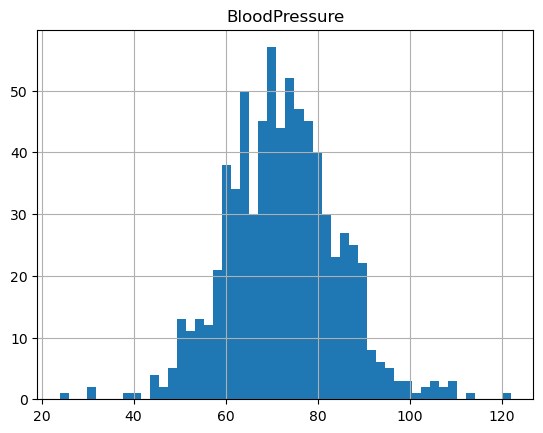

In [32]:
diabetesdata.hist('BloodPressure', bins=50)

We can just use the mean here, but we can also be a bit fancier. It seems likely that a health indicator like blood pressure could be related to other health indicators like BMI or maybe age.

<Axes: xlabel='BloodPressure', ylabel='BMI'>

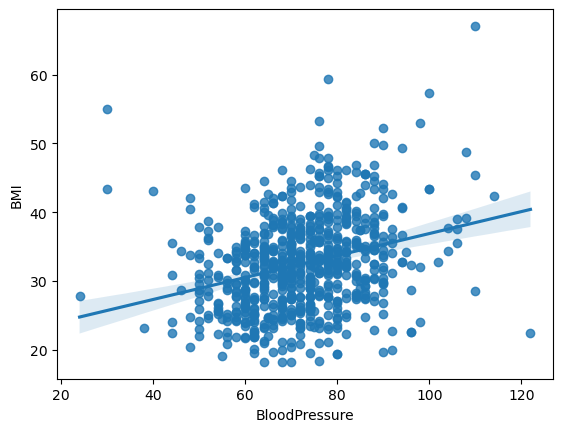

In [33]:
sns.regplot(x = 'BloodPressure', y = 'BMI', data = diabetesdata)

<Axes: xlabel='BloodPressure', ylabel='Age'>

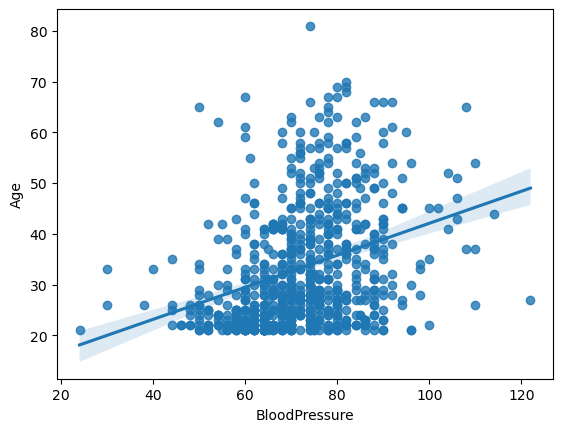

In [34]:
sns.regplot(x = 'BloodPressure', y = 'Age', data = diabetesdata)

It's not entirely clear although there seems to be some relation. Let's use a linear regression to estimate values. We are using machine learning to impute so we can do better machine learning!

Let's drop the missing values from BloodPressure so we can do the regression on the remaining data.

In [35]:
linearregressiondata = diabetesdata.dropna(subset='BloodPressure')
linearregressiondata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               733 non-null    int64  
 1   Glucose                   733 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             539 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  733 non-null    float64
 7   Age                       733 non-null    int64  
 8   Outcome                   733 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 57.3 KB


We have two columns that are still incomplete. For machine learning, we need complete rows. Would insulin and skin thickness be related to blood pressure? Maybe, but then we can't fill in the data. So lets just disregard those columns.

In [36]:
linregcolumns = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = linearregressiondata[linregcolumns]
y = linearregressiondata['BloodPressure']
model.fit(X, y)

LinearRegression()

Cool, now let's apply this model to the rows that are missing the blood pressure.

In [37]:
missingbloodpressure = diabetesdata[pd.isna(diabetesdata['BloodPressure'])]
bloodpred = model.predict(missingbloodpressure[linregcolumns])
bloodpred

array([73.93919638, 70.43554838, 69.82130944, 67.43011138, 75.72758182,
       67.80630365, 65.98555148, 85.29475279, 70.89036191, 69.2958976 ,
       70.83444983, 69.59476835, 71.64088114, 82.09136259, 74.36202586,
       65.34034314, 80.51618983, 68.78238338, 64.10474537, 76.73269019,
       76.19487501, 73.76001417, 77.37352951, 68.01409313, 70.85614871,
       69.52508808, 70.39727244, 62.35302028, 66.57881594, 74.10097232,
       69.73632448, 68.06996674, 64.5521442 , 77.9464623 , 72.48189817])

Well, those look like reasonable values. Let's copy those to the original dataset

In [38]:
diabetesdata.loc[pd.isna(diabetesdata['BloodPressure']), 'BloodPressure'] = bloodpred

And now we have BloodPressure filled in with reasonable values.

In [39]:
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'BloodPressure'}>]], dtype=object)

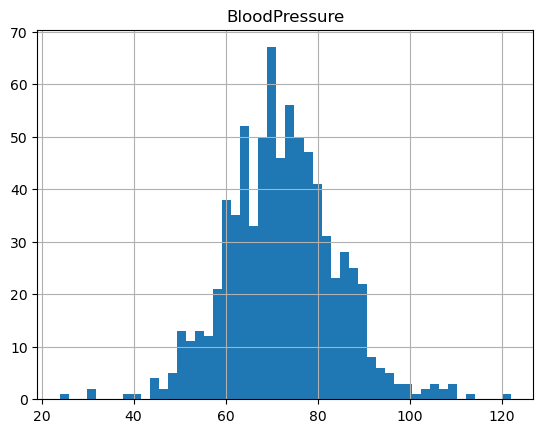

In [40]:
diabetesdata.hist('BloodPressure', bins=50)

How many good rows do we have now?

In [41]:
len(diabetesdata.dropna())

394

So we didn't actually gain anything here. It looks like the missing values for BloodPressure coincide with those for Insulin or SkinThickness. Still, it was educational to do so, so I'm just leaving this in.

What to do about two remaining incomplete columns. It's a bit much to impute maybe. So let's just leave those incomplete columns out. Also, reset the index while we are at it. Not strictly necessary but it looks cleaner and it might prevent subtle issues later on.

In [42]:
diabetesdata.dropna(inplace=True)
diabetesdata.reset_index(inplace=True)
diabetesdata.drop('index', axis=1, inplace=True)

In [43]:
diabetesdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
389,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
390,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
391,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
392,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


Training time!

In [44]:
X = diabetesdata[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetesdata['Outcome']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.717391304347826

So that's about 75% which isn't too bad. We did that ith $k=4$ but maybe other values would have better results. This is called *Hyperparameter optimization*. That is tuning the parameter of the algorithm itself.

For KNN, it's pretty easy, we can just iterate over various values of $k$ and see what works best. However, Scikit Learn has built-in methods for this as well, so let's just use those.

In [45]:
from sklearn.model_selection import GridSearchCV

Specify a range. Doing just odd values of $k$ because that's supposed to be better since it avoids ties when comparing neighbouring points. Other stuff we can tune is the distance metric. The default is Minkowski which calculate the distance in the "normal" way for $p=2$. That is, $d = \sqrt{x^2 + y^2}$, but you could also have $p=1$ which is "city block" or "Manhattan" where $d = \lvert x \rvert + \lvert y \rvert$. The one for $p=3$ is pretty weird, but why not. That's $d = \sqrt[3]{\lvert x \rvert^3 + \lvert y \rvert^3}$.

In [68]:
param_grid = {
    'n_neighbors': range(1,50,2),
    'p': range(1,3)
}

In [69]:
gridsearch = GridSearchCV(neigh, param_grid, scoring='accuracy')
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': range(1, 50, 2), 'p': range(1, 3)},
             scoring='accuracy')

In [70]:
gridsearch.best_params_

{'n_neighbors': 3, 'p': 2}

In [71]:
gridsearch.best_score_

0.8231884057971015

So I guess $k=7$ is slightly better! However, beware that the improvements are pretty small. If you run this notebook again, you might get different outcomes because the test/train set will be split differently every time (unless you specify a random seed).